In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import seaborn as sns

from joblib import Parallel, delayed

from IPython.display import clear_output

In [3]:
df = pd.read_pickle('./data/j1c-features-cleaned.pkl', compression='gzip')

In [4]:
graph_array = np.load('./data/vectorized_graphs.npz')['arr_0']

In [5]:
df.shape

(12005167, 13)

In [10]:
df.head()

,num_edges,is_planar,total_triangles,triangle_ratio,avg_shortest_path_length,global_clustering_coefficient,avg_clustering_coefficient,square_clustering,density,node_connectivity,global_efficiency,local_efficiency,modularity
1,1,True,0,0.0,1.000000,0.0,0.0,0.0,0.022222,0,0.022222,0.0,0.0
2,2,True,0,0.0,1.333333,0.0,0.0,0.0,0.044444,0,0.055556,0.0,0.0
3,3,True,0,0.0,1.500000,0.0,0.0,0.0,0.066667,0,0.100000,0.0,0.0
4,4,True,0,0.0,1.600000,0.0,0.0,0.0,0.088889,0,0.155556,0.0,0.0
5,5,True,0,0.0,1.666667,0.0,0.0,0.0,0.111111,0,0.222222,0.0,0.0


In [5]:
ORDERING = dict(
    # num_edges = "# Edges",
    density="Density",
    # total_triangles = '# Triangles',
    triangle_ratio="Triangle Ratio",
    # is_planar="Is Planar Graph?",
    avg_shortest_path_length="Avg Shortest Path",
    global_clustering_coefficient="Global Clustering",
    avg_clustering_coefficient="Avg Clustering",
    # square_clustering="Square Clustering",
    global_efficiency="Global Efficiency",
    local_efficiency="Local Efficiency",
    # degree_assortativity = "Degree Assortativity",
    # diameter = 'Diameter',
    node_connectivity="Node Connectivity",
    modularity="Modularity",
)

In [9]:
df.head()

,num_edges,is_planar,total_triangles,triangle_ratio,avg_shortest_path_length,global_clustering_coefficient,avg_clustering_coefficient,square_clustering,density,node_connectivity,global_efficiency,local_efficiency,modularity
1,1,True,0,0.0,1.000000,0.0,0.0,0.0,0.022222,0,0.022222,0.0,0.0
2,2,True,0,0.0,1.333333,0.0,0.0,0.0,0.044444,0,0.055556,0.0,0.0
3,3,True,0,0.0,1.500000,0.0,0.0,0.0,0.066667,0,0.100000,0.0,0.0
4,4,True,0,0.0,1.600000,0.0,0.0,0.0,0.088889,0,0.155556,0.0,0.0
5,5,True,0,0.0,1.666667,0.0,0.0,0.0,0.111111,0,0.222222,0.0,0.0


In [12]:
ORDERING = dict(
    # num_edges = "# Edges",
    #density="Density",
    # total_triangles = '# Triangles',
    #triangle_ratio="Triangle Ratio",
    # is_planar="Is Planar Graph?",
    avg_shortest_path_length="Avg Shortest Path",
    global_clustering_coefficient="Global Clustering",
    avg_clustering_coefficient="Avg Clustering",
    # square_clustering="Square Clustering",
    global_efficiency="Global Efficiency",
    local_efficiency="Local Efficiency",
    # degree_assortativity = "Degree Assortativity",
    # diameter = 'Diameter',
    #node_connectivity="Node Connectivity",
    modularity="Modularity",
)

In [25]:
def hexbin(
    df,
    df2,
    ordering,
    x_col="modularity",
    gridsize=40,
    cmap="Blues",
    bins="log",
    title=None,
    savefig=None,
):
    with sns.plotting_context('talk'):
        xlabel = ordering[x_col]
        ordering = {key:val for key, val in ordering.items() if key != x_col}

        ncols = 2
        nrows = len(ordering)
        figsize = (4*ncols, 3*nrows)

        fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize, sharex=True, sharey='row')

        for idx, (col, y_label) in enumerate(ordering.items()):
            ax[idx, 0].hexbin(
                x=df[x_col], y=df[col], cmap=cmap, gridsize=gridsize, bins=bins, mincnt=1
            )
            sns.despine(ax=ax[idx, 0])
            #ax[idx, 0].set_xlabel('Modularity')
            ax[idx, 0].set_ylabel(y_label)

            ax[idx, 1].hexbin(
                x=df2[x_col], y=df2[col], cmap=cmap, gridsize=gridsize, bins=bins, mincnt=1
            )
            sns.despine(ax=ax[idx, 1])
            #ax[idx].set_xlabel('Modularity', fontsize=20)
            #ax[idx].set_ylabel(y_label, fontsize=20)

        for i in range(2):
            ax[-1, i].set_xlabel(xlabel)

#         if len(ordering) != (ncols * nrows):
#             for i in range(1, len(ax) - len(ordering) + 1):
#                 fig.delaxes(ax[-i])

        fig.tight_layout()

        if title is not None:
            fig.suptitle(title, y=1.02, fontsize=30)
            
        ax[0, 0].set_title("All Graphs")
        #ax[0, 1].set_title("Graphs with 20 +/- 3 Edges")
        #ax[0, 1].set_title(f"Graphs with {}")

        if savefig is not None:
            fig.savefig(f"{savefig}.pdf", dpi=300, bbox_inches='tight')
            fig.savefig(f"{savefig}.png", dpi=150, bbox_inches='tight')

In [42]:

#df_ = df.reset_index(drop=True)

for num_edge in np.unique(df.num_edges)[10:-10]:
    np.random.seed(1)
    tmp = df[df.num_edges == num_edge]
    
    random_idx = np.random.choice(tmp.index)
    norms = np.linalg.norm(graph_array - graph_array[random_idx], axis=1)
    
    mask = np.arange(1, graph_array.shape[0]+1)[norms <= 3]
    tmp = df.loc[mask]
    print(tmp.shape)

    print(f"Making figure {num_edge}")
    hexbin(
        df,
        tmp, 
        ORDERING, 
        title=f"Base Graph Edges={num_edge}, Threshold=3, n={tmp.shape[0]}", 
        savefig=f"./figures/num_edge_plot_{num_edge}"
    )
    plt.close()

(108302, 13)
Making figure 11
(89686, 13)
Making figure 12
(62767, 13)
Making figure 13
(69218, 13)
Making figure 14
(176763, 13)
Making figure 15
(146703, 13)
Making figure 16
(175174, 13)
Making figure 17
(222993, 13)
Making figure 18
(139687, 13)
Making figure 19
(404761, 13)
Making figure 20
(305849, 13)
Making figure 21
(297847, 13)
Making figure 22
(516063, 13)
Making figure 23
(303660, 13)
Making figure 24
(339241, 13)
Making figure 25
(304488, 13)
Making figure 26
(143294, 13)
Making figure 27
(283628, 13)
Making figure 28
(143412, 13)
Making figure 29
(39370, 13)
Making figure 30
(652710, 13)
Making figure 31
(15346, 13)
Making figure 32
(33169, 13)
Making figure 33
(55399, 13)
Making figure 34
(108296, 13)
Making figure 35


## Use density as measure

In [39]:
densities = np.unique(df.density)
for idx, den in enumerate(densities):
    if (idx < 9) or (idx > 35):
        continue
    
    tmp = df[df.density.isin(densities[idx-2:idx+3])]
    print(tmp.shape)

    print(f"Making figure {den}")
    hexbin(
        df,
        tmp, 
        ORDERING, 
        title=f"Base Graph Edges={int(den * 45)}, Threshold=2, n={tmp.shape[0]}", 
        savefig=f"./figures/density_plot_{int(den * 45)}"
    )
    plt.close()

(26831, 13)
Making figure 0.2222222238779068
(61066, 13)
Making figure 0.24444444477558136
(131281, 13)
Making figure 0.2666666805744171
(264945, 13)
Making figure 0.2888889014720917
(499763, 13)
Making figure 0.31111112236976624
(879157, 13)
Making figure 0.3333333432674408
(1440685, 13)
Making figure 0.35555556416511536
(2198095, 13)
Making figure 0.3777777850627899
(3122821, 13)
Making figure 0.4000000059604645
(4132633, 13)
Making figure 0.42222222685813904
(5096319, 13)
Making figure 0.4444444477558136
(5858980, 13)
Making figure 0.46666666865348816
(6281641, 13)
Making figure 0.4888888895511627
(6281641, 13)
Making figure 0.5111111402511597
(5858980, 13)
Making figure 0.5333333611488342
(5096319, 13)
Making figure 0.5555555820465088
(4132633, 13)
Making figure 0.5777778029441833
(3122821, 13)
Making figure 0.6000000238418579
(2198095, 13)
Making figure 0.6222222447395325
(1440685, 13)
Making figure 0.644444465637207
(879157, 13)
Making figure 0.6666666865348816
(499763, 13)
Makin

## Try horizontal layout

In [20]:
def hexbin(
    df,
    df2,
    ordering,
    x_col="modularity",
    gridsize=40,
    cmap="Blues",
    bins="log",
    title=None,
    savefig=None,
):
    with sns.plotting_context('talk'):
        xlabel = ordering[x_col]
        ordering = {key:val for key, val in ordering.items() if key != x_col}

        ncols = len(ordering)
        nrows = 2
        figsize = (4*ncols, 3*nrows)

        fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize, 
                               sharex=False, 
                               sharey='col')

        for idx, (col, y_label) in enumerate(ordering.items()):
            ax[0, idx].hexbin(
                x=df[x_col], y=df[col], cmap=cmap, gridsize=gridsize, bins=bins, mincnt=1
            )
            sns.despine(ax=ax[0, idx])
            #ax[idx, 0].set_xlabel('Modularity')
            ax[0, idx].set_ylabel(y_label)

            ax[1, idx].hexbin(
                x=df2[x_col], y=df2[col], cmap=cmap, gridsize=gridsize, bins=bins, mincnt=1
            )
            sns.despine(ax=ax[1, idx])
            #ax[idx].set_xlabel('Modularity', fontsize=20)
            #ax[idx].set_ylabel(y_label, fontsize=20)

        for i in range(2):
            ax[-1, i].set_xlabel(xlabel)

#         if len(ordering) != (ncols * nrows):
#             for i in range(1, len(ax) - len(ordering) + 1):
#                 fig.delaxes(ax[-i])

        fig.tight_layout()

        if title is not None:
            fig.suptitle(title, y=1.02, fontsize=30)
            
        ax[0, 0].set_title("All Graphs")
        ax[0, 1].set_title("Graphs with 20 +/- 3 Edges")

        if savefig is not None:
            fig.savefig(f"{savefig}.pdf", dpi=300, bbox_inches='tight')
            fig.savefig(f"{savefig}.png", dpi=150, bbox_inches='tight')

(404761, 13)
Making figure 20


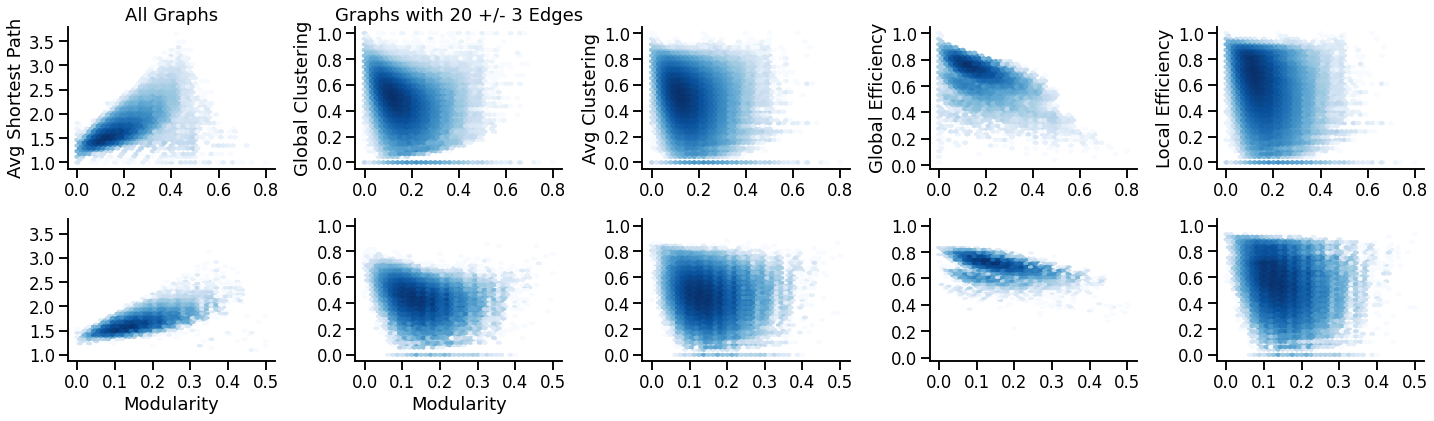

In [21]:
np.random.seed(1)

#df_ = df.reset_index(drop=True)

for num_edge in np.unique(df.num_edges)[19:20]:
    tmp = df[df.num_edges == num_edge]
    
    random_idx = np.random.choice(tmp.index)
    norms = np.linalg.norm(graph_array - graph_array[random_idx], axis=1)
    
    mask = np.arange(1, graph_array.shape[0]+1)[norms <= 3]
    tmp = df.loc[mask]
    print(tmp.shape)

    print(f"Making figure {num_edge}")
    hexbin(
        df,
        tmp, 
        ORDERING, 
        #title=f"Base Graph Edges={num_edge}, Threshold=3, n={tmp.shape[0]}", 
        #savefig=f"for_ohbm"
    )